### PSOアニメーションのテスト
ここのページにPSOの実験結果のファイルからアニメーションを作るためのコードを載せていきたいと思います。  
全てのコードはChatGPT(or Copilot)作成のコードがきちんと動作しているかの確認になっていきます。  
ただしく実行されていたらひとまず完了としていきます。  
場合によってはこのページでDEのアニメーションも作成するかもしれません。  

KeyboardInterrupt: 

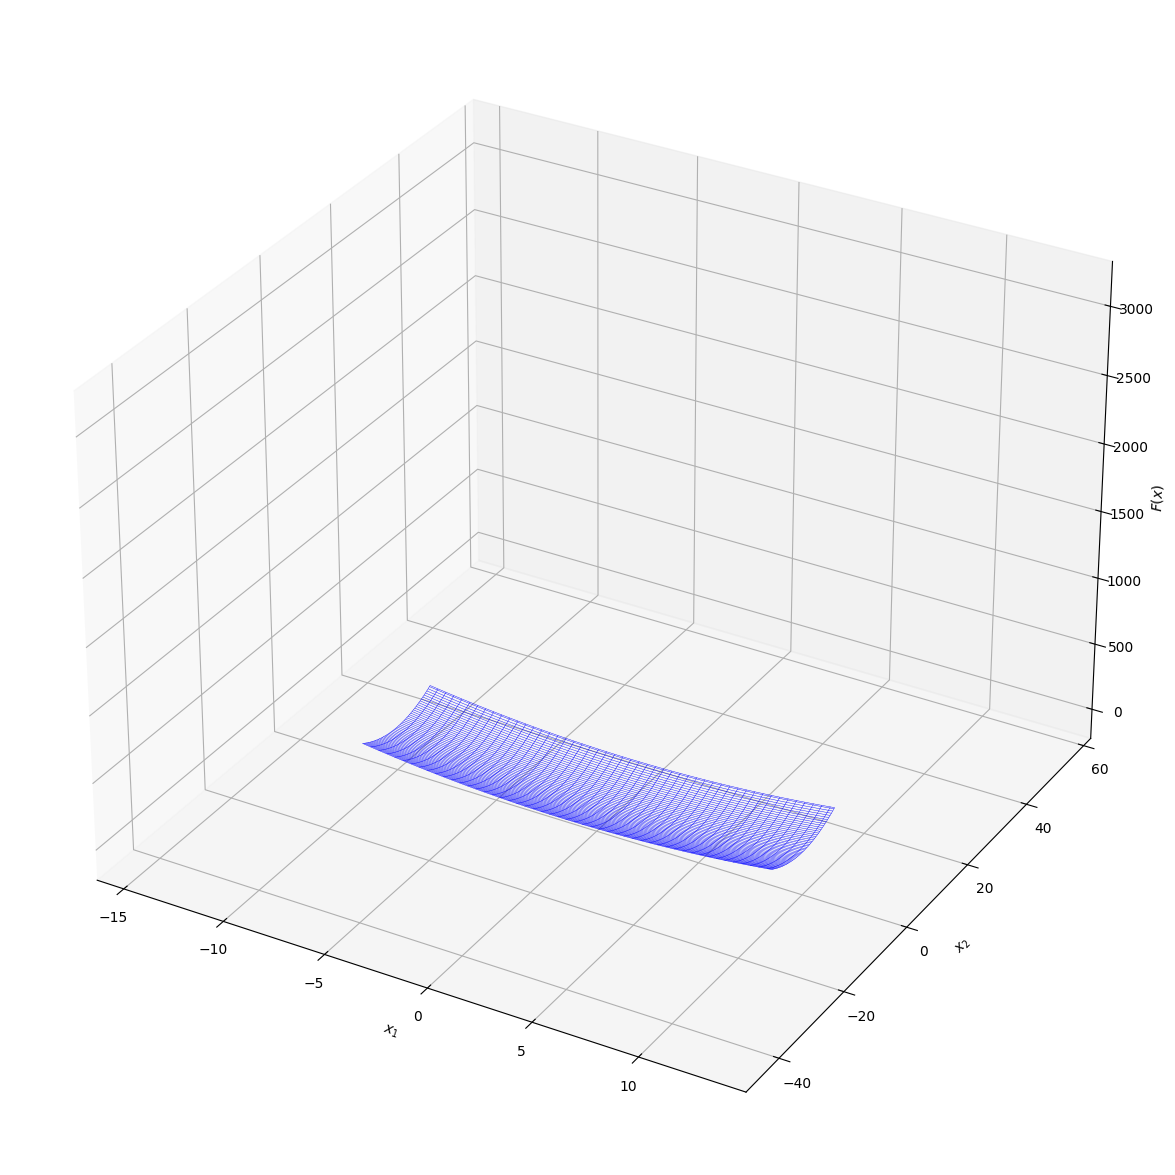

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import csv

# 評価関数（Java側で使用したものと同じにする必要がある）
def fitness(x1, x2):
    z = x1 * x1 + x2 * x2
    # z = 2*x1**2 - 1.05*x1**4 + (x1**6)/6 + x1*x2 + x2**2
    return z

# 粒子位置のデータを読み込む
def load_positions(filename):
    positions = []
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            # 最後の要素は適合度なので無視
            positions.append([float(val) for val in row[:-1]])
    return positions

# アニメーション作成用
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$F(x)$')

# Javaで使用した範囲に合わせて変更
x1_min, x1_max = -10, 10
x2_min, x2_max = -10, 10

x1_coord = np.linspace(x1_min, x1_max, 100)
x2_coord = np.linspace(x2_min, x2_max, 100)
X, Y = np.meshgrid(x1_coord, x2_coord)

ax.plot_wireframe(X, Y, fitness(X, Y), color='b', rstride=2, cstride=2, linewidth=0.3)
ims = []

# 位置データを読み込む
positions = load_positions('PSO_anim_result.csv')
N = len(positions[0]) // 2  # 粒子の数を計算
T = len(positions) // N  # 時間ステップの数を計算

# 各時間ステップでの位置をアニメーションとしてプロット
for t in range(T):
    x1_vals = [positions[t*N + i][0] for i in range(N)]
    x2_vals = [positions[t*N + i][1] for i in range(N)]
    scores = [fitness(x1_vals[i], x2_vals[i]) for i in range(N)]
    im = ax.scatter3D(x1_vals, x2_vals, scores, c='r')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
ani.save('./anim_PSO_from_java.gif', writer='pillow') 

# アニメーションを保存せずに直接表示したい場合は以下を使用
# plt.show()
